<h1 align='center' style='color:#e85d04'>Data Visualization in Python</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
df = pd.read_excel('Canada.xlsx',1, skiprows = range(20), skipfooter = 2)

In [3]:
df.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)

In [4]:
df.rename(columns = {'OdName':'country','AreaName':'continent','RegName':'region'}, inplace = True)

In [5]:
df['total'] = df.sum(axis = 1)
df = df.set_index('country')

In [6]:
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)

In [7]:
df.columns = df.columns.astype(str)
years = list(map(str, range(1980,2013)))

# 1. Line Plot

## Single line

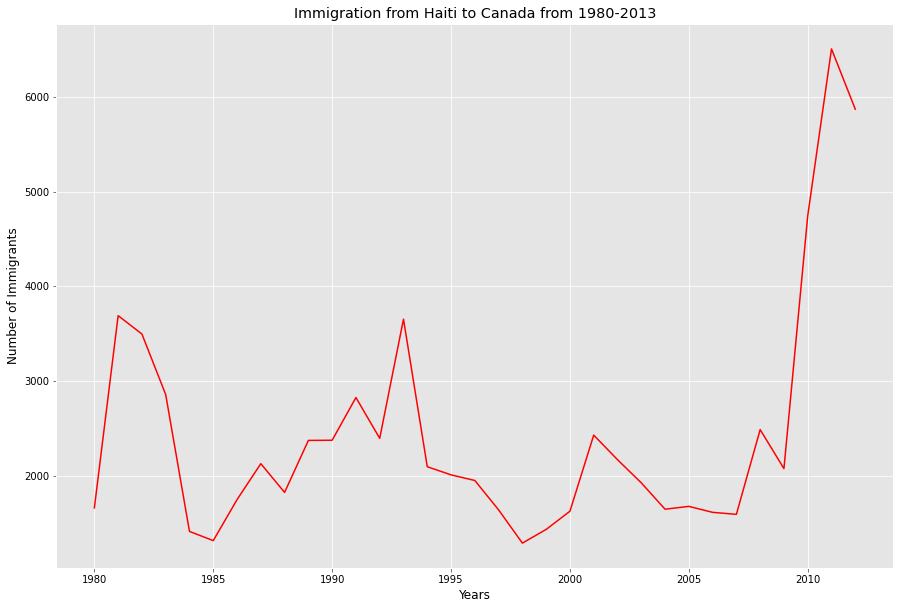

In [8]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig1 = df.loc['Haiti', years].plot(kind = 'line', color = 'r')
plt.title('Immigration from Haiti to Canada from 1980-2013',color = 'black')
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('line_single.jpeg')
plt.show()

## Multiple lines

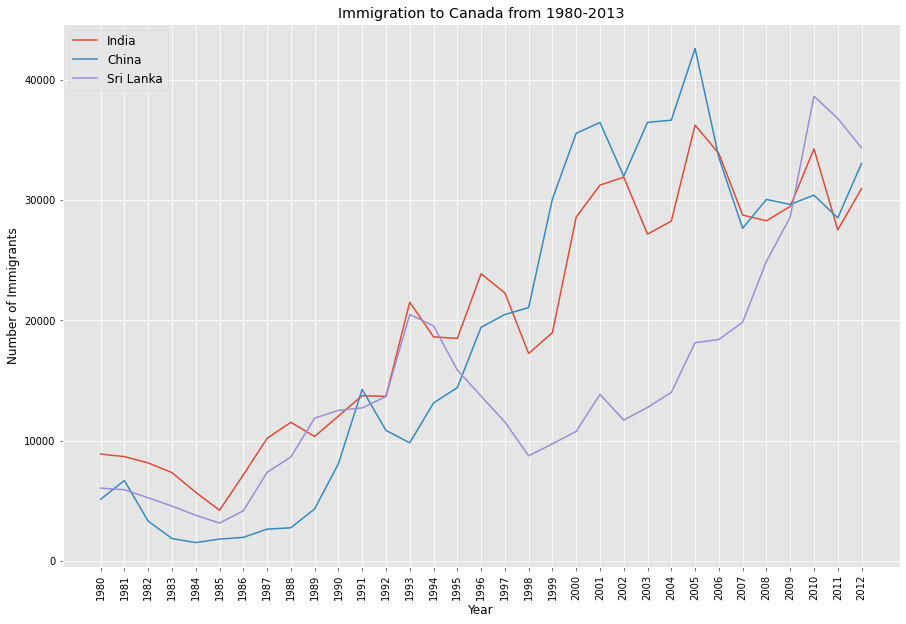

In [9]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig2 = plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('line_multiple.png')
plt.show()

## Cyberpunk Line Chart

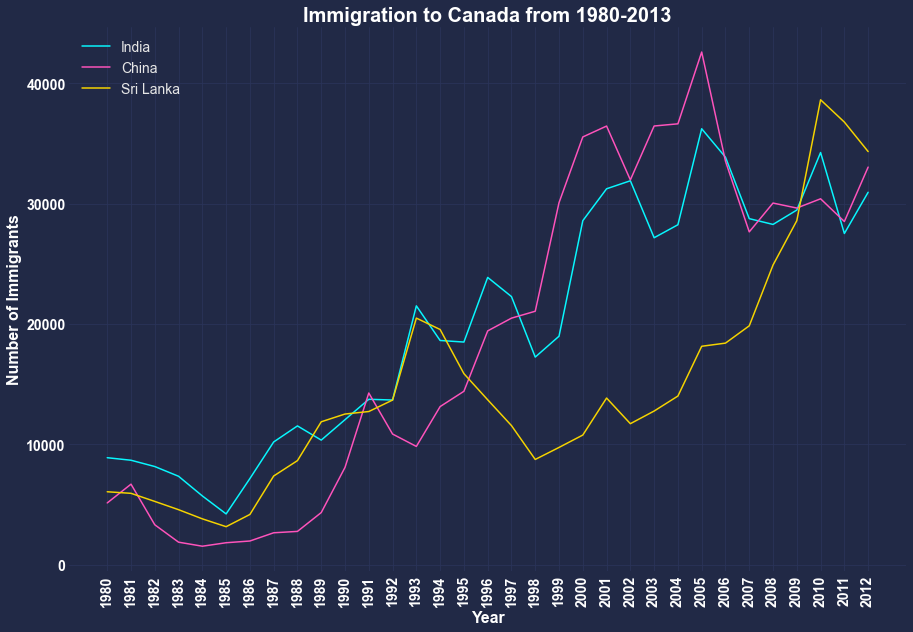

In [10]:
import mplcyberpunk
style.use('cyberpunk')
plt.rcParams['figure.figsize'] = (15,10)

plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xticks(rotation = 90, color = 'white', fontsize = 14, fontweight = 'bold')
plt.yticks(color = 'white', fontsize = 14, fontweight = 'bold')
plt.title('Immigration to Canada from 1980-2013',color = 'white', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year',color = 'white', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Immigrants',color = 'white',fontsize = 16, fontweight = 'bold')
plt.savefig('cyber_line.jpeg')

plt.show()

# 2. Bar Plot

## Vertical

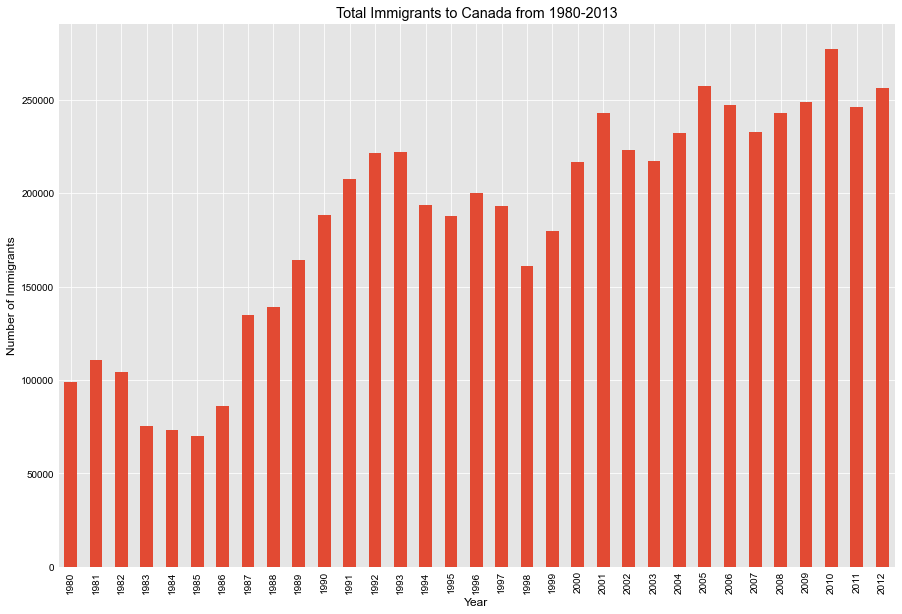

In [11]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_tot = pd.DataFrame(df.loc[:,years].sum())
df_tot.rename(columns = {0:'total'}, inplace = True)
fig3 = df_tot.plot(kind = 'bar', legend = False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('bar_vertical.png')
plt.show()

## Grouped

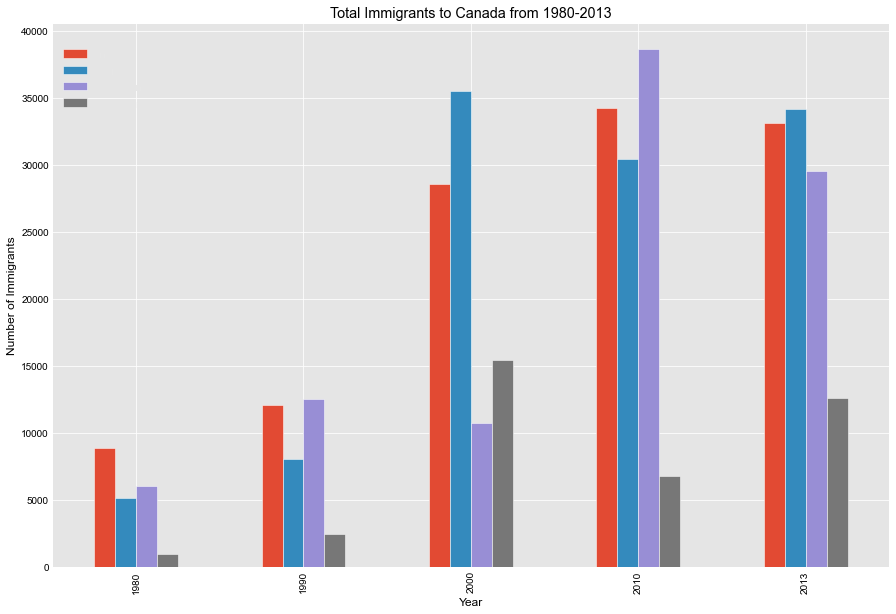

In [12]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)
fig4 = df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')
plt.show()

## Horizontal

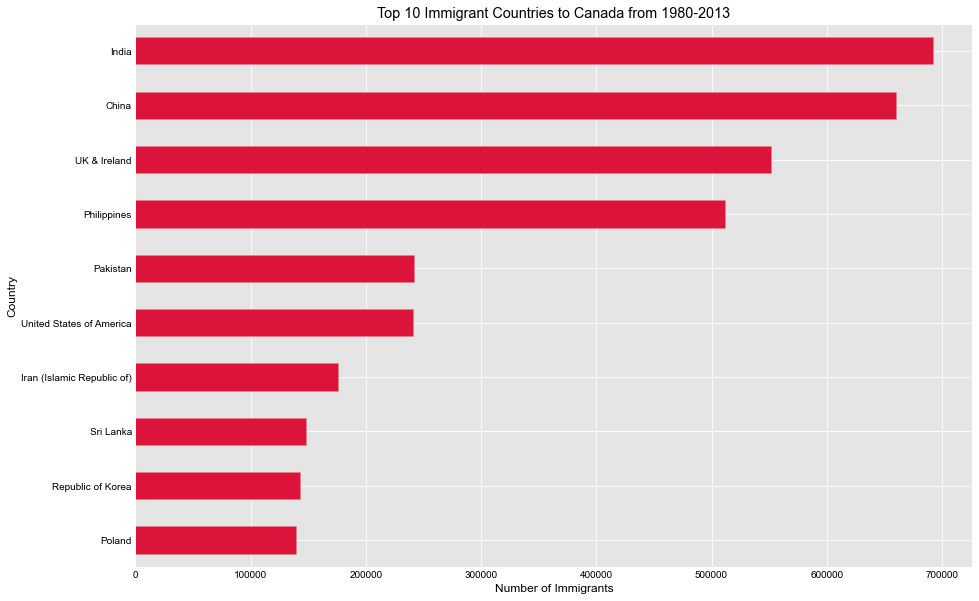

In [13]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_top10 = pd.DataFrame(df.nlargest(10,'total')['total'].sort_values(ascending = True))
fig5 = df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')
plt.show()

# 3. Histogram

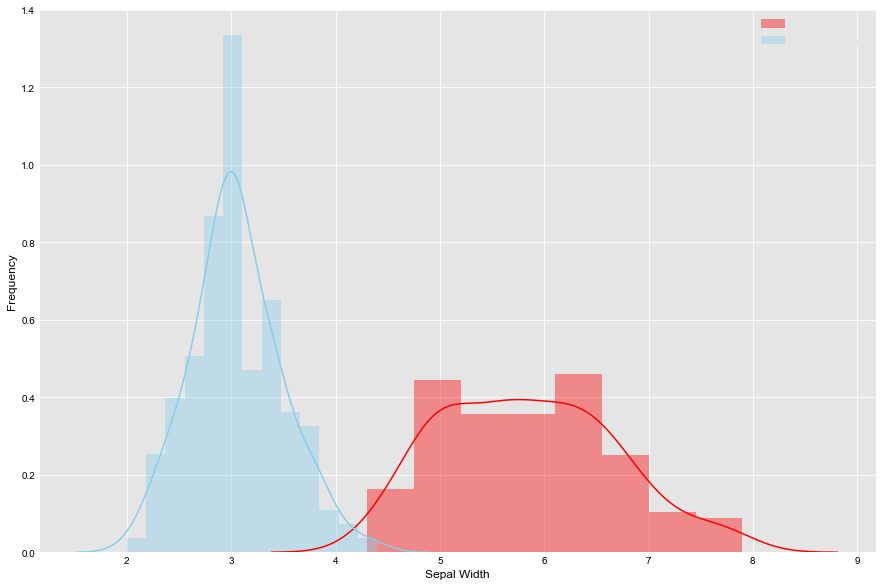

In [14]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_iris = sb.load_dataset('iris')
fig6 = sb.distplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length')
sb.distplot(df_iris['sepal_width'], color = 'skyblue', label = 'Sepal Width')
plt.legend(fontsize = 12)
plt.xlabel('Sepal Width', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')
plt.show()

# 4. Area Plots

##  Cyberpunk Simple Area Chart

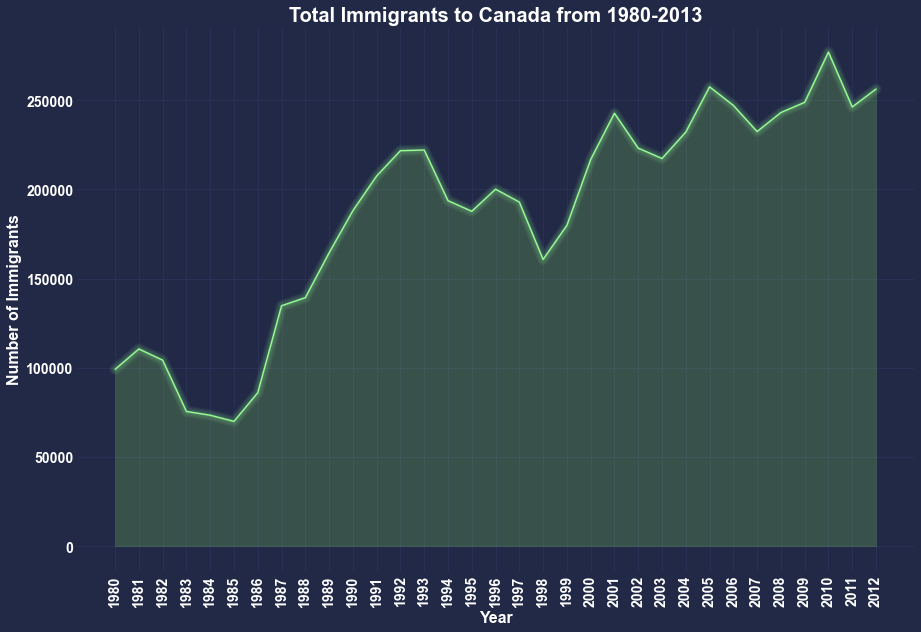

In [15]:
import mplcyberpunk

style.use('cyberpunk')
plt.rcParams['figure.figsize'] = (15,10)

plt.fill_between(df_tot.index, df_tot['total'], color = 'greenyellow', alpha = 0.1)
plt.plot(df_tot.index, df_tot['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20,fontweight = 'bold', color = 'white')
plt.yticks(fontsize = 14, color = 'white',fontweight = 'bold')
plt.xticks(fontsize = 14, rotation = 90, color = 'white',fontweight = 'bold')
plt.xlabel('Year', fontsize = 16, color = 'white',fontweight = 'bold')
plt.ylabel('Number of Immigrants', fontsize = 16, color = 'white',fontweight = 'bold')
plt.savefig('cyber_area_simple.png')

plt.show()

## Simple

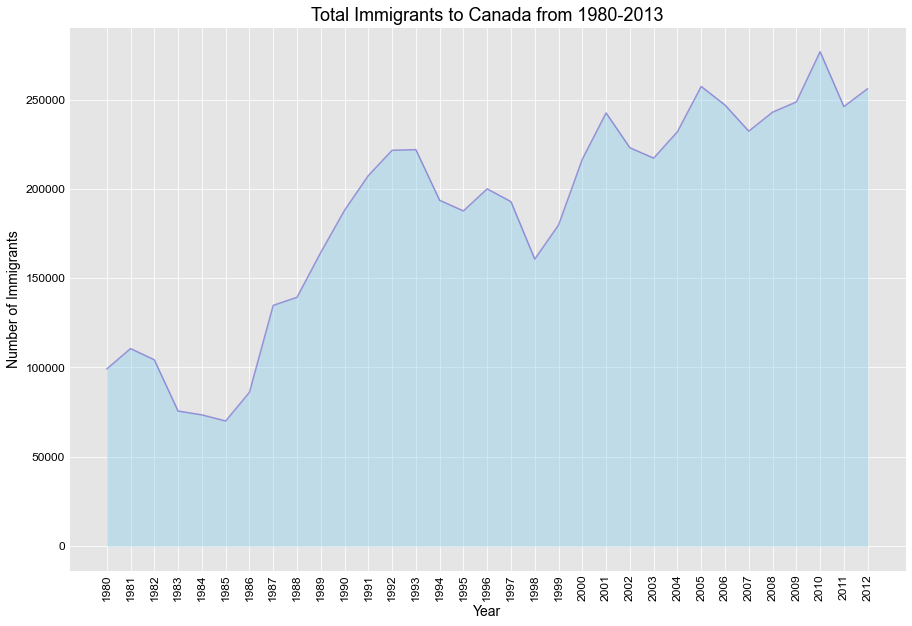

In [16]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig7 = plt.fill_between(df_tot.index, df_tot['total'], color="skyblue", alpha=0.4)
plt.plot(df_tot.index, df_tot['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.savefig('area_simple.png')
plt.show()

## Stacked

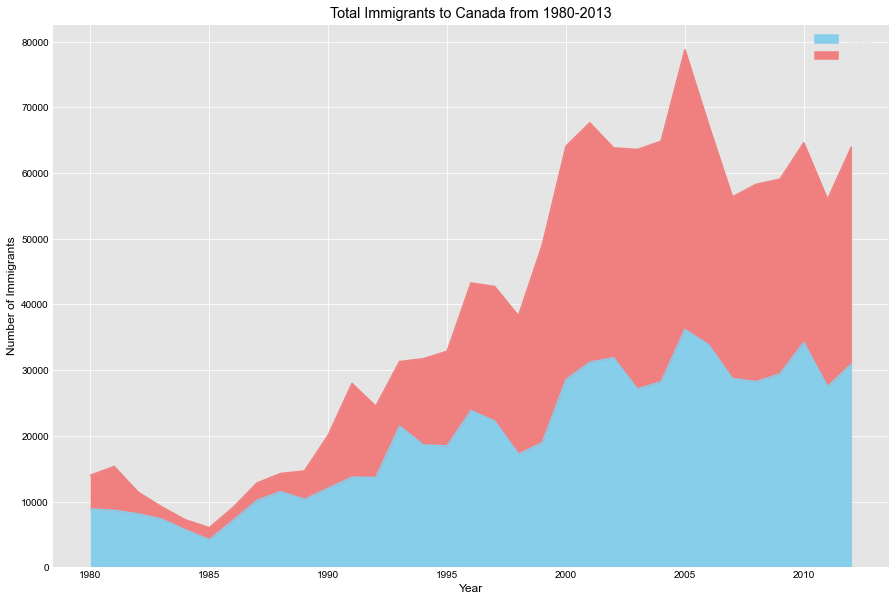

In [17]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

color = ['skyblue','lightcoral']
top2_list = df.nlargest(2, 'total').index.tolist()
df_top2 = pd.DataFrame(df.loc[top2_list, years].T)
fig8 = df_top2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')
plt.show()

## Unstacked

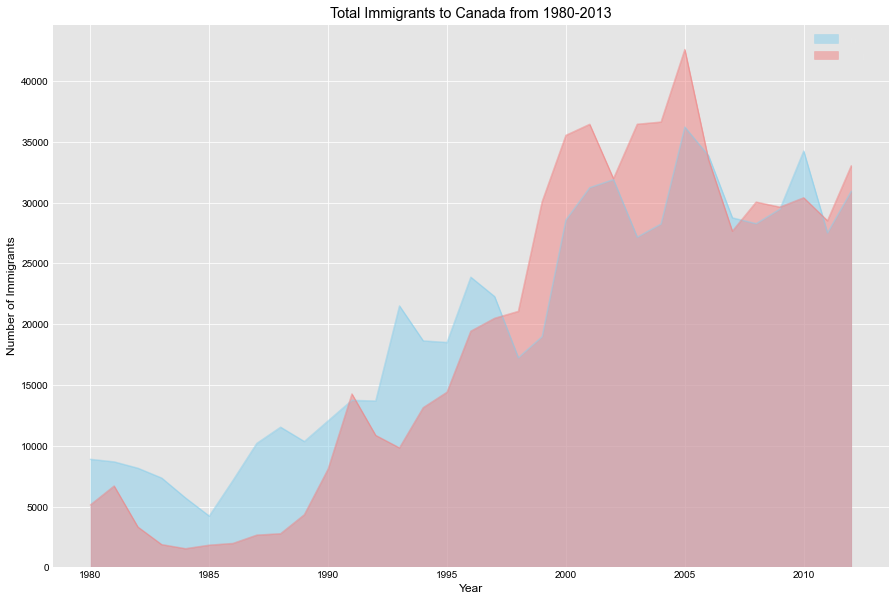

In [18]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig9 = df_top2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')
plt.show()

# 5. Box Plot

## Horizontal

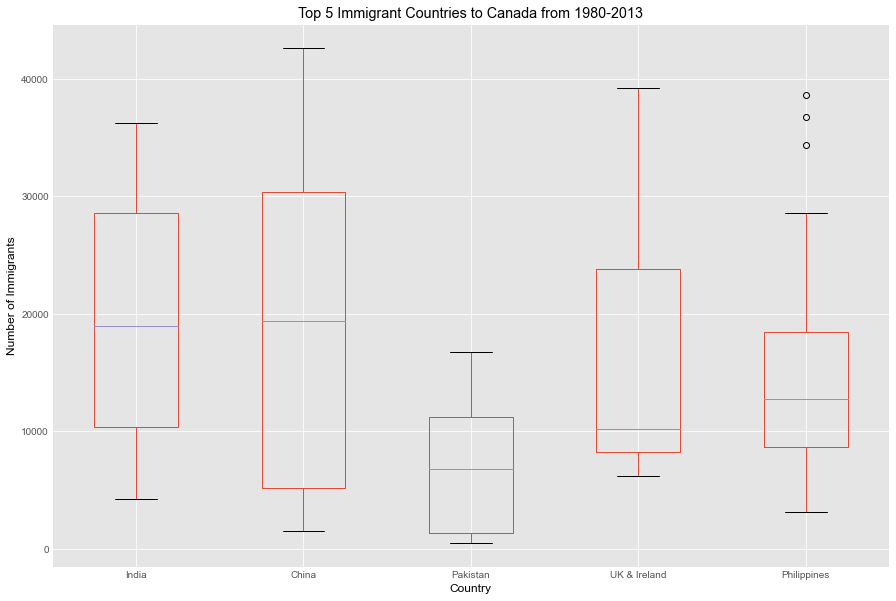

In [19]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_box = pd.DataFrame(df.loc[['India','China','Pakistan','UK & Ireland','Philippines'], years].T)
fig10 = df_box.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_horizontal.png')
plt.show()

## Vertical

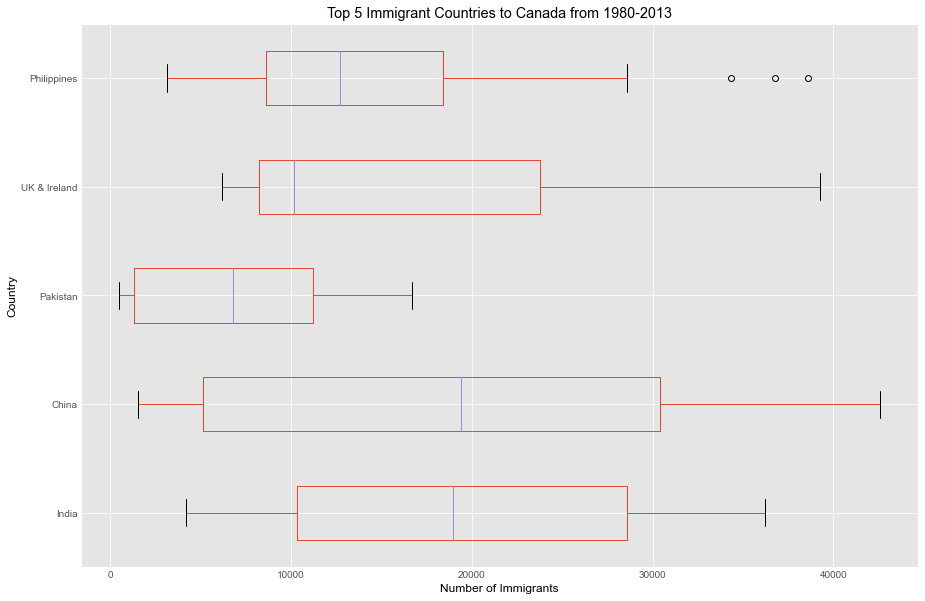

In [20]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig11 = df_box.plot(kind = 'box', vert = False)
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.ylabel('Country', color = 'black')
plt.xlabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')
plt.show()

# 6. Scatter Plot

In [21]:
df_scatter = pd.DataFrame(df.loc[['China','UK & Ireland']].T)
df_scatter.drop(['continent','region','total'], axis = 0, inplace = True)

## Simple

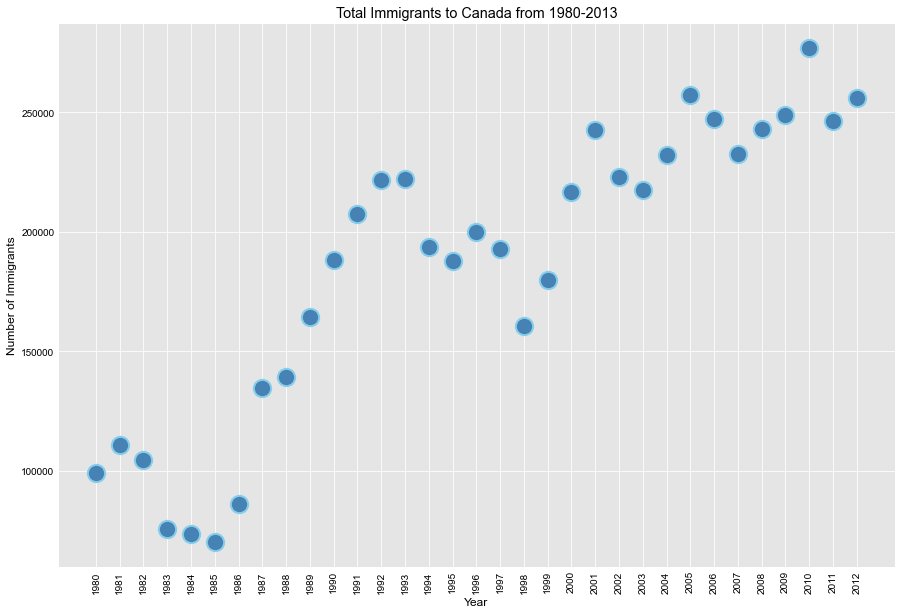

In [22]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig12 = plt.scatter(df_tot.index, df_tot['total'], color = 'steelblue', s = 300, edgecolor = 'skyblue', linewidth = 2)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black', rotation = 90)
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('scatter_simple.png')
plt.show()

## Multiple

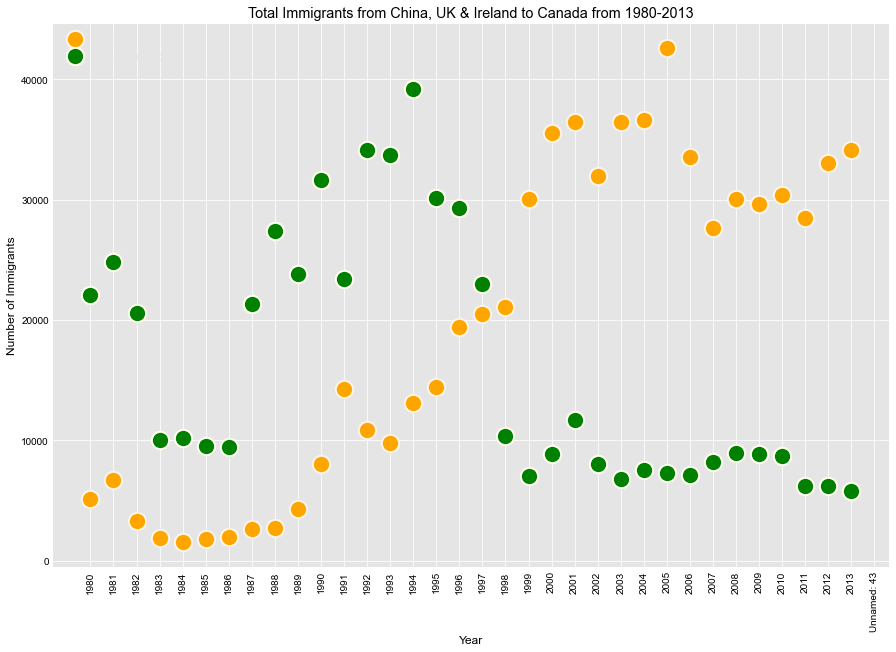

In [23]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig13 = plt.scatter(df_scatter.index, df_scatter['China'], s = 300, label = 'China', color = 'orange', 
                    edgecolor = 'oldlace', linewidth = 2)
plt.scatter(df_scatter.index, df_scatter['UK & Ireland'], s = 300, label = 'UK & Ireland', color = 'green', 
            edgecolor = 'ivory', linewidth = 2)
plt.legend(fontsize = 12, loc = 'upper left')
plt.title('Total Immigrants from China, UK & Ireland to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black', rotation = 90)
plt.yticks(color = 'black')
plt.savefig('scatter_multiple.png')
plt.show()

# 7. Bubble Plot

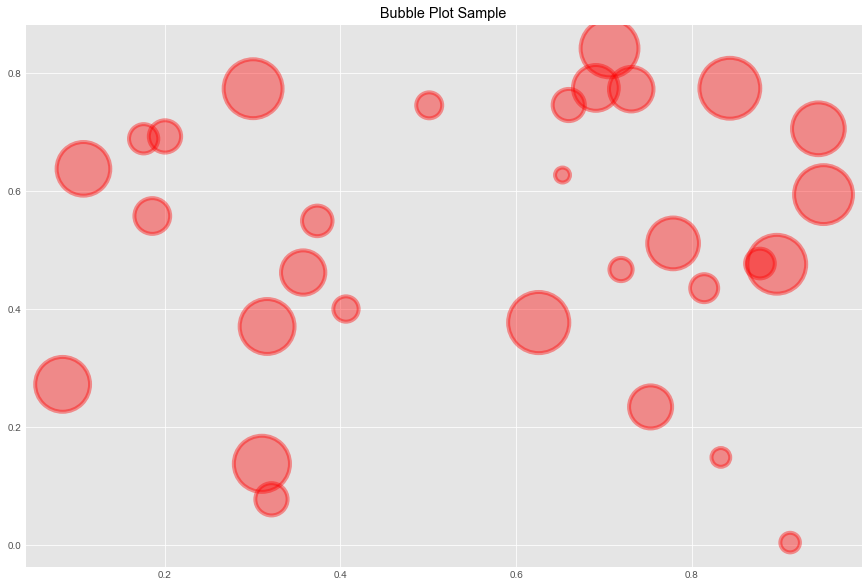

In [24]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

x = np.random.rand(1,30,1)
y = np.random.rand(1,30,1)
size = np.random.rand(1,30,1)
fig14 = plt.scatter(x,y,s = size*4000, alpha = 0.4, color = 'r', edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample', color = 'black')
plt.savefig('bubble.png')
plt.show()

# 8. Pie Chart

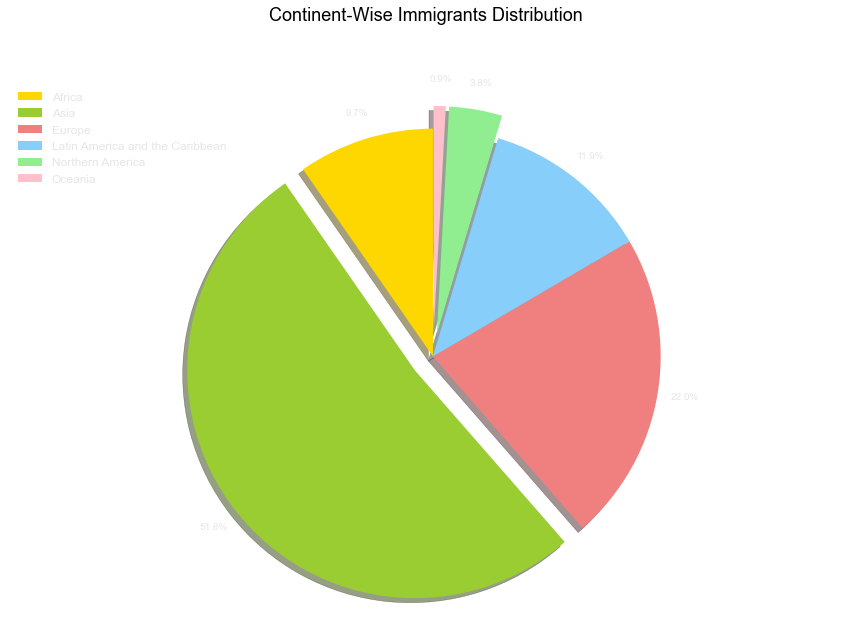

In [25]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]
fig15 = plt.pie(df_pie['total'], colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')
plt.show()

# 9. Regression Plot

## Strong trend

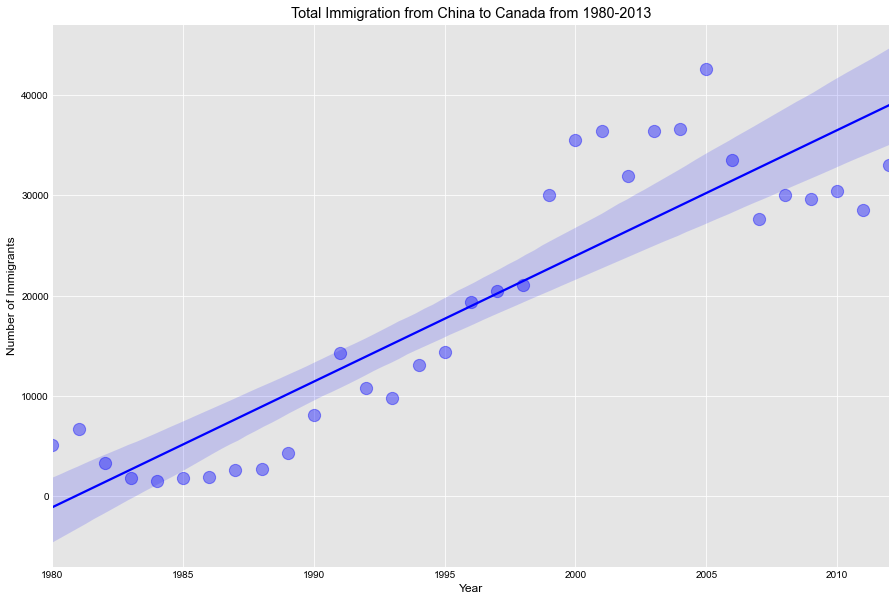

In [26]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_reg = pd.DataFrame(df.loc['China',years])
df_reg.reset_index(inplace = True)
df_reg.rename(columns = {'index':'year'}, inplace = True)
df_reg[['year','China']] = df_reg[['year','China']].astype(int)
fig16 = sb.regplot(x = 'year', y = 'China', data = df_reg, color = 'b', 
                   scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigration from China to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('reg_strong.png')
plt.show()

## Weak trend

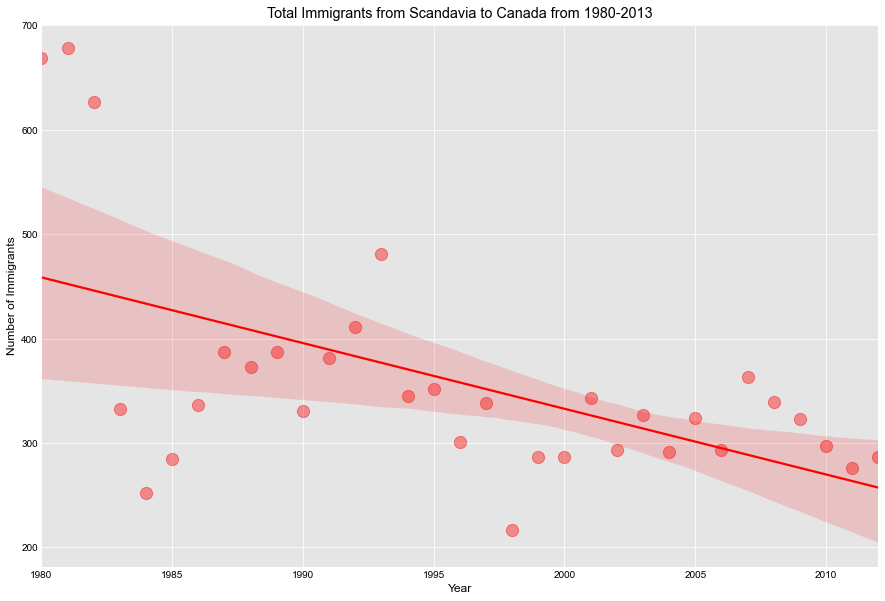

In [27]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

df_reg1 = pd.DataFrame(df.loc[['Denmark','Norway','Sweden'],years].sum())
df_reg1.reset_index(inplace = True)
df_reg1.rename(columns = {'index':'year',0:'total'}, inplace = True)
df_reg1[['year','total']] = df_reg1[['year','total']].astype(int)
fig17 = sb.regplot(x = 'year', y = 'total', data = df_reg1, color = 'Red', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigrants from Scandavia to Canada from 1980-2013', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('reg_weak.png')
plt.show()


# 10. Doughnut Chart

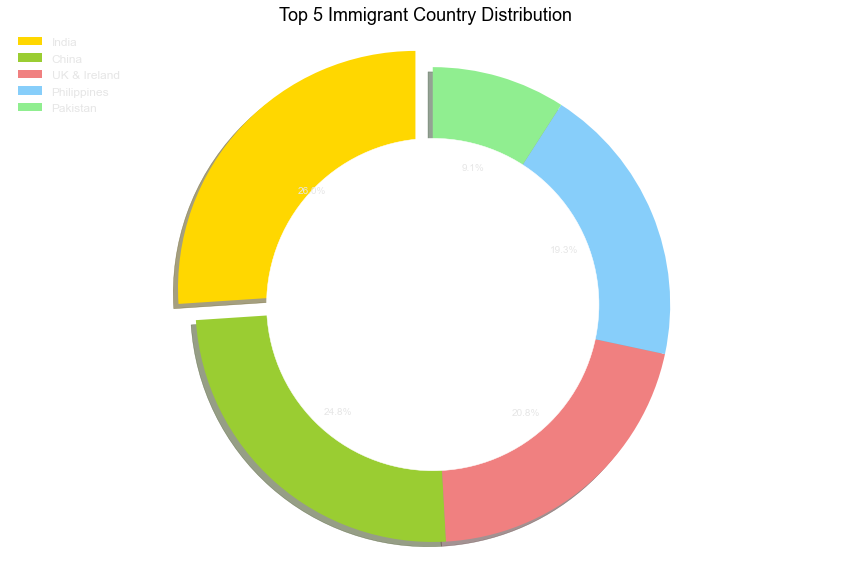

In [28]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

top5_list = df.nlargest(5, 'total').index.tolist()
df_top5 = pd.DataFrame(df.loc[top5_list, 'total'].T)
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
plt.pie(df_top5['total'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig20 = plt.gcf()
fig20.gca().add_artist(circle)
plt.legend(df_top5.index, fontsize = 12, loc = 'upper left')
plt.title('Top 5 Immigrant Country Distribution', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')
plt.show()

# 11. Lollipop chart


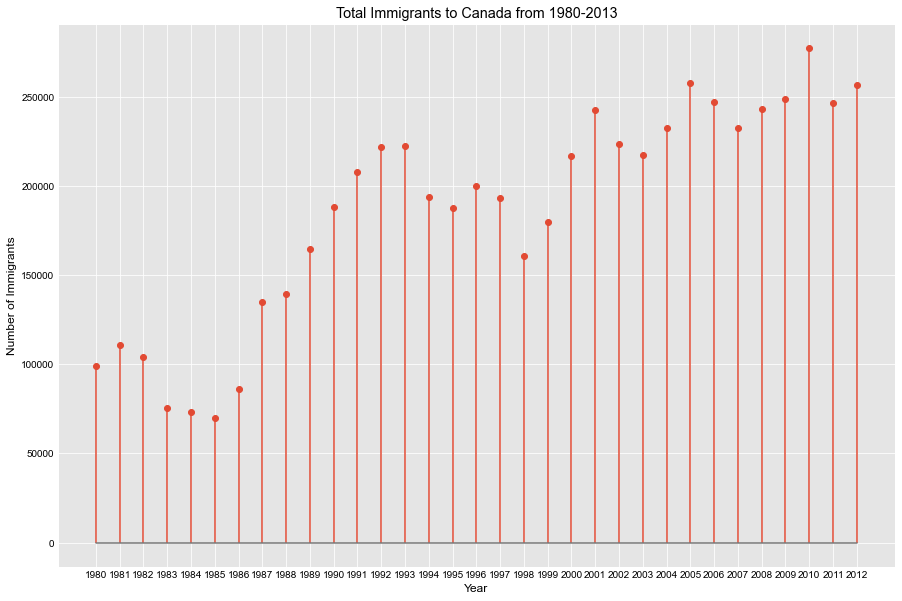

In [29]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

fig19 = plt.stem(df_tot.index, df_tot['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')
plt.show()